In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

win/loss function - based on two arbitrary "skill" values for each player (simplified compared to real world, 
but alright as an approximation)
I'm going to use a slightly modified version of the win probability that chess elo is supposed to follow: 

In chess, the elo system is supposed to show represent relative skill levels, with the system being calibrated such that you have a 10:1 chance of winning over someone 400 elo below you. 

The exact formula for this, given an elo $a$ of player X, and an elo $b$ of player Y, is:
$$\text{Win\%(X over Y)} = 10^{((a - b)/400)}:1 = \frac{10^{((a - b)/400)}}{10^{((a - b)/400)} + 1}$$

Credit: https://www.hexwiki.net/index.php/Elo_rating

Since I'm just going to use a skill ranking of 0 - 1, I'm going to modify this so that instead of it being calibrated around 400, it's calibrated around 0.2

In [43]:
def game(skill1, skill2):
    relative_log_difference = np.pow(10, (skill1 - skill2)/0.2)
    return np.random.random() < relative_log_difference/(relative_log_difference + 1)

Here are some quick statistics on how this probability calculation works out in practice:

In [44]:
loss_probabilities = []
for skill_diff in np.arange(0, 1.05, 0.05):
    relative_log_difference = np.pow(10, (skill_diff)/0.2)
    print(f"Chance of losing to a player {skill_diff:<4g} skill below you: " +
          f"{(1 - relative_log_difference/(relative_log_difference + 1)) * 100:.3g}%")

Chance of losing to a player 0    skill below you: 50%
Chance of losing to a player 0.05 skill below you: 36%
Chance of losing to a player 0.1  skill below you: 24%
Chance of losing to a player 0.15 skill below you: 15.1%
Chance of losing to a player 0.2  skill below you: 9.09%
Chance of losing to a player 0.25 skill below you: 5.32%
Chance of losing to a player 0.3  skill below you: 3.07%
Chance of losing to a player 0.35 skill below you: 1.75%
Chance of losing to a player 0.4  skill below you: 0.99%
Chance of losing to a player 0.45 skill below you: 0.559%
Chance of losing to a player 0.5  skill below you: 0.315%
Chance of losing to a player 0.55 skill below you: 0.178%
Chance of losing to a player 0.6  skill below you: 0.0999%
Chance of losing to a player 0.65 skill below you: 0.0562%
Chance of losing to a player 0.7  skill below you: 0.0316%
Chance of losing to a player 0.75 skill below you: 0.0178%
Chance of losing to a player 0.8  skill below you: 0.01%
Chance of losing to a play

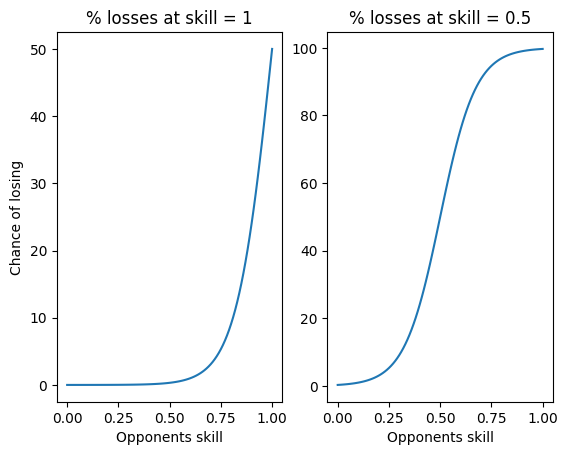

In [45]:
loss_probabilities = []
for skill in np.arange(0, 1.01, 0.01):
    relative_log_difference = np.pow(10, (1 - skill)/0.2)
    loss_probabilities.append((1 - relative_log_difference/(relative_log_difference + 1)) * 100)
plt.subplot(1, 2, 1)
plt.title("% losses at skill = 1")
plt.xlabel("Opponents skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0, 1.01, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0, 1.01, 0.01):
    relative_log_difference = np.pow(10, (0.5 - skill)/0.2)
    loss_probabilities.append((1 - relative_log_difference/(relative_log_difference + 1)) * 100)
plt.subplot(1, 2, 2)
plt.title("% losses at skill = 0.5")
plt.xlabel("Opponents skill")
plt.plot(np.arange(0, 1.01, 0.01), loss_probabilities)